In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environmental-sensor-data-132k/iot_telemetry_data.csv
/kaggle/input/motionsense-dataset/data_subjects_info.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/dws_1/._sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_4.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_5.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/wlk_7/._sub_13.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_16.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_18.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_3.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_12.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv
/kaggle/input/mot

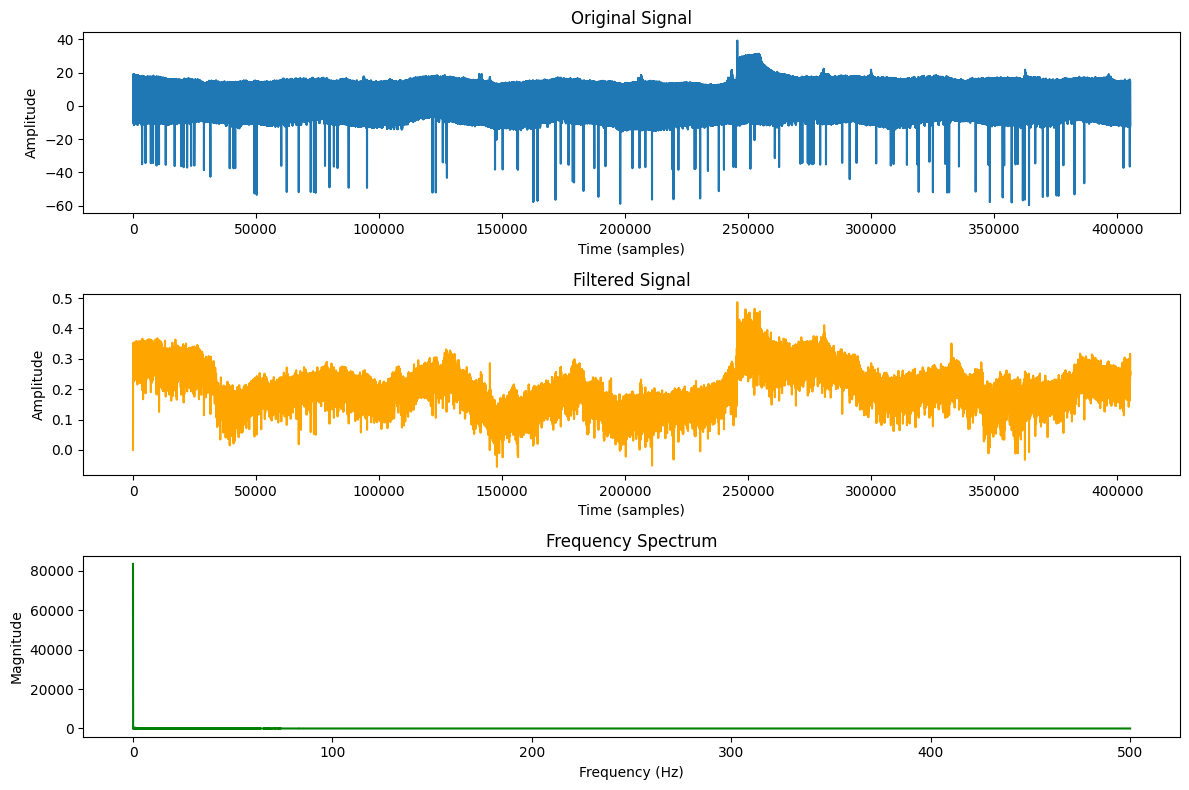

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, detrend

# Step 1: Load Signal Data
def load_signal(file_path):
    # Load the CSV file using pandas
    data = pd.read_csv(file_path)
    # Extract the 'temp' (temperature) column
    signal = data['humidity'].values
    signal = detrend(signal)

    return signal

# Step 2: Preprocess Signal
def preprocess_signal(signal):    
    # Subtract the mean to remove the DC component
    signal = signal - np.mean(signal)
    
    # Normalize the signal between -1 and 1
    signal_min, signal_max = np.min(signal), np.max(signal)
    normalized_signal = 2 * (signal - signal_min) / (signal_max - signal_min) - 1
    return normalized_signal

# Step 3: Apply Filters
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_filter(signal, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

# Step 4: Analyze Signal (FFT)
def analyze_signal(signal, fs):
    n = len(signal)
    f = np.fft.rfftfreq(n, 1/fs)
    fft_magnitude = np.abs(np.fft.rfft(signal))
    return f, fft_magnitude

# Step 5: Visualize and Save Results
def visualize_signal(original_signal, processed_signal, fft_freq, fft_magnitude, fs):
    plt.figure(figsize=(12, 8))

    # Original Signal
    plt.subplot(3, 1, 1)
    plt.plot(original_signal)
    plt.title("Original Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")

    # Filtered Signal
    plt.subplot(3, 1, 2)
    plt.plot(processed_signal, color='orange')
    plt.title("Filtered Signal")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")

    # FFT Magnitude
    plt.subplot(3, 1, 3)
    plt.plot(fft_freq, fft_magnitude, color='green')
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

# Main Pipeline Execution
if __name__ == "__main__":
    # Load signal data
    signal = load_signal('/kaggle/input/environmental-sensor-data-132k/iot_telemetry_data.csv')

    # Preprocess the signal
    normalized_signal = preprocess_signal(signal)

    # Apply a low-pass filter
    cutoff_freq = 50  # Hz
    sampling_rate = 1000  # Hz
    filtered_signal = apply_filter(normalized_signal, cutoff_freq, sampling_rate)

    # Analyze the signal using FFT
    fft_freq, fft_magnitude = analyze_signal(filtered_signal, sampling_rate)

    # Visualize results
    visualize_signal(signal, filtered_signal, fft_freq, fft_magnitude, sampling_rate)
